# Question 5

In [2]:
df <- read.csv('data-p2/more_selected_interactions_mimic3d.csv')
# x1 <- df$NumTransfers
# x2 <- df$NumCallouts
# x3 <- df$NumTransfers.admit_type_EMERGENCY
# x4 <- df$NumCallouts
# x5 <- df$NumCallouts.admit_type_EMERGENCY
x <- model.matrix(~ . - 1, data = df[, !names(df) %in% c('LOSdays')]) 
y <- df$LOSdays

set.seed(0)

In [3]:
library(MASS)

Warning message:
"package 'MASS' was built under R version 4.4.1"


In [4]:
model <- lm(y ~ ., data=as.data.frame(x))

# Get the summary of the model
summary_model <- summary(model)

# Display the summary
summary_model


Call:
lm(formula = y ~ ., data = as.data.frame(x))

Residuals:
    Min      1Q  Median      3Q     Max 
-13.945  -6.033  -2.396   1.073 192.809 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                        9.531542   0.231428  41.186
NumTransfers                                      -0.021589   0.221217  -0.098
NumCallouts.NumTransfers                           3.993666   1.563889   2.554
NumTransfers.admit_type_EMERGENCY                 -0.909783   0.270947  -3.358
NumCallouts                                      -16.562569   4.087009  -4.052
NumCallouts.admit_type_EMERGENCY                  -3.724971   4.458103  -0.836
NumCallouts.NumProcs                              -3.927573   0.857778  -4.579
NumTransfers.insurance_Medicare                   -1.289852   0.255153  -5.055
NumProcEvents.NumTransfers                         0.030340   0.008461   3.586
NumCallouts.NumMicroLabs                         

In [5]:
stepwise_model <- stepAIC(model, direction = "both")

# Display the results
summary(stepwise_model)

Start:  AIC=14748.88
y ~ NumTransfers + NumCallouts.NumTransfers + NumTransfers.admit_type_EMERGENCY + 
    NumCallouts + NumCallouts.admit_type_EMERGENCY + NumCallouts.NumProcs + 
    NumTransfers.insurance_Medicare + NumProcEvents.NumTransfers + 
    NumCallouts.NumMicroLabs + NumDiagnosis + NumCallouts.NumDiagnosis + 
    NumMicroLabs + NumTransfers.insurance_Private + NumCallouts.insurance_Medicare + 
    NumTransfers.admit_location_EMERGENCY.ROOM.ADMIT



                                                   Df Sum of Sq    RSS   AIC
- NumTransfers                                      1       1.3 418121 14747
- NumCallouts.NumMicroLabs                          1       7.7 418127 14747
- NumCallouts.insurance_Medicare                    1      14.6 418134 14747
- NumMicroLabs                                      1      15.6 418135 14747
- NumCallouts.NumDiagnosis                          1      49.2 418169 14747
- NumDiagnosis                                      1      82.7 418202 14748
- NumCallouts.admit_type_EMERGENCY                  1      98.6 418218 14748
<none>                                                          418120 14749
- NumTransfers.admit_location_EMERGENCY.ROOM.ADMIT  1     642.4 418762 14751
- NumCallouts.NumTransfers                          1     921.2 419041 14753
- NumTransfers.admit_type_EMERGENCY                 1    1592.6 419712 14758
- NumProcEvents.NumTransfers                        1    1816.3 419936 14760


Call:
lm(formula = y ~ NumCallouts.NumTransfers + NumTransfers.admit_type_EMERGENCY + 
    NumCallouts + NumCallouts.NumProcs + NumTransfers.insurance_Medicare + 
    NumProcEvents.NumTransfers + NumTransfers.insurance_Private + 
    NumTransfers.admit_location_EMERGENCY.ROOM.ADMIT, data = as.data.frame(x))

Residuals:
    Min      1Q  Median      3Q     Max 
-13.727  -5.967  -2.411   1.025 193.034 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                        9.487181   0.221354  42.860
NumCallouts.NumTransfers                           3.976739   1.061842   3.745
NumTransfers.admit_type_EMERGENCY                 -0.819092   0.198623  -4.124
NumCallouts                                      -18.718418   1.612764 -11.606
NumCallouts.NumProcs                              -4.083571   0.818097  -4.992
NumTransfers.insurance_Medicare                   -1.280669   0.243746  -5.254
NumProcEvents.NumTransfers  

In [6]:
model_summary <- summary(stepwise_model)

# Extract coefficients and p-values
coefficients <- model_summary$coefficients

significant_predictors <- rownames(coefficients)[coefficients[, "Pr(>|t|)"] < 0.0001]

print(significant_predictors)

[1] "(Intercept)"                       "NumTransfers.admit_type_EMERGENCY"
[3] "NumCallouts"                       "NumCallouts.NumProcs"             
[5] "NumTransfers.insurance_Medicare"   "NumTransfers.insurance_Private"   


In [7]:
x1 <- df$NumTransfers.admit_type_EMERGENCY
x2 <- df$NumCallouts
x3 <- df$NumCallouts.NumProcs
x4 <- df$NumTransfers.insurance_Medicare
x5 <- df$NumTransfers.insurance_Private

In [8]:
likehd <- function(param){
  param <- as.numeric(param)
  a1 <- param[1]
  a2 <- param[2]
  a3 <- param[3]
  a4 <- param[4]
  a5 <- param[5]
  b <- param[6]
  sd = param[7]

  pred = as.numeric(x1 * a1 + x2 * a2 + x3 * a3 + x4 * a4 + x5 * a5) + b

  # if (sd <= 0) {
  #   return(-Inf)  # Invalid standard deviation, return -Inf
  # }

  singlelikelihoods = dnorm(y, mean = pred, sd = sd, log = TRUE)
  sumll = sum(singlelikelihoods)
  

  # print(paste("Log-likelihood:", sumll))
  
  return(sumll)
}

In [6]:
prior <- function(param, lambda = 1) {
  param <- as.numeric(param)
  a1 <- param[1]
  a2 <- param[2]
  a3 <- param[3]
  a4 <- param[4]
  a5 <- param[5]
  b <- param[6]
  sd = param[7]

  # Jeffrey's prior for coefficient
  a1prior <- sum(-log(abs(a1)))
  a2prior <- sum(-log(abs(a2)))
  a3prior <- sum(-log(abs(a3)))
  a4prior <- sum(-log(abs(a4)))
  a5prior <- sum(-log(abs(a5)))

  # Jeffrey's prior for intercept
  bprior <- sum(-log(abs(b)))

  # if (sd <= 0) {
  #   return(-Inf)  # Invalid sd, return -Inf
  # }

  # Exponential prior for standard deviation
  sdprior <- dexp(sd, rate = lambda, log = TRUE)


  # Debug: Print log-prior values
  print(paste("Prior a1:", a1prior, "a2:",a2prior, "b:", bprior, "sd:", sdprior))

  return(a1prior + a2prior + a3prior + a4prior + bprior + sdprior)
}

In [18]:
posterior <- function(param){
return (likehd(param) + prior(param))
}


In [19]:
proposalfunction <- function(param){ 
  proposal <- rnorm(3, mean = param[1:3], sd = rep(0.01, 3))  # Propose for the first 3 parameters
  proposal_sd <- abs(rnorm(1, mean = param[4], sd = 0.01))     # Half-normal for sd (absolute value)
  return(c(proposal, proposal_sd))
}

run_metropolis_MCMC <- function(startvalue, iterations){
  num_params <- length(startvalue)  # Number of parameters based on the starting value
  chain = array(dim = c(iterations + 1, num_params))  # Initialize the chain for the correct number of params
  chain[1,] = startvalue  # Set the initial value of the chain
  
  for (i in 1:iterations){
    proposal = proposalfunction(chain[i,])   # Generate a proposal using the current chain value

    # Debug: print intermediate values to ensure calculations are correct
    print("Calculating posterior for proposal:")
    print(proposal)
    post_proposal <- posterior(proposal)  # Calculate posterior for the proposal
    print(post_proposal)
    
    post_chain <- posterior(chain[i,])  # Calculate posterior for the current chain value
    print(post_chain)
    
    probab <- exp(post_proposal - post_chain)  # Metropolis acceptance criterion
    print(probab)  # Check if probab is calculated properly

    # Ensure probab is a scalar value
    probab <- min(probab, 1)  # Probability should be <= 1

    # Accept or reject the proposal based on the probability
    if (runif(1) < probab){
      chain[i + 1,] = proposal   # Accept the proposal
    } else {
      chain[i + 1,] = chain[i,]  # Reject the proposal, keep the current value
    }
  }
  
  return(chain)  # Return the entire MCMC chain
}

# Generate a starting value with 105 parameters
start_value <- runif(4)  # Random initial values for the parameters

# Run the Metropolis-Hastings MCMC with the starting value and 10,000 iterations
chain <- run_metropolis_MCMC(start_value, 10)

[1] "Calculating posterior for proposal:"
[1] 0.37270925 0.96213159 0.47466475 0.07396102
[1] "Prior a1: 0.986956659373471 a2: 0.0386040548698755 b: 0.745146506106665 sd: -0.0739610205378732"
[1] -752918.1
[1] "Prior a1: 0.999363915571213 a2: 0.0550280370887907 b: 0.732474001011778 sd: -0.101314770756289"
[1] -394762.4
[1] 0
[1] "Calculating posterior for proposal:"
[1] 0.3660557 0.9568923 0.4788636 0.1040379
[1] "Prior a1: 1.00496967178288 a2: 0.0440644456129205 b: 0.736339487171457 sd: -0.10403791472127"
[1] -376954.4
[1] "Prior a1: 0.999363915571213 a2: 0.0550280370887907 b: 0.732474001011778 sd: -0.101314770756289"
[1] -394762.4
[1] Inf
[1] "Calculating posterior for proposal:"
[1] 0.3687490 0.9622988 0.4779218 0.1011685
[1] "Prior a1: 0.997639123621387 a2: 0.0384302874228213 b: 0.738308080859135 sd: -0.101168467401425"
[1] -400883.1
[1] "Prior a1: 1.00496967178288 a2: 0.0440644456129205 b: 0.736339487171457 sd: -0.10403791472127"
[1] -376954.4
[1] 0
[1] "Calculating posterior for 

In [13]:
burnIn = 5000
acceptance = 1-mean(duplicated(chain[-(1:burnIn),]))

In [14]:
print(head(chain[-(1:burnIn), 1]))  # Check the first few values of the chain after burn-in
print(summary(chain[-(1:burnIn), 1]))  # Summary statistics of the chain for parameter a

[1] -0.1392708 -0.1392708 -0.1392708 -0.1392708 -0.1392708 -0.1390526


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.2334 -0.1972 -0.1907 -0.1851 -0.1732 -0.1245 


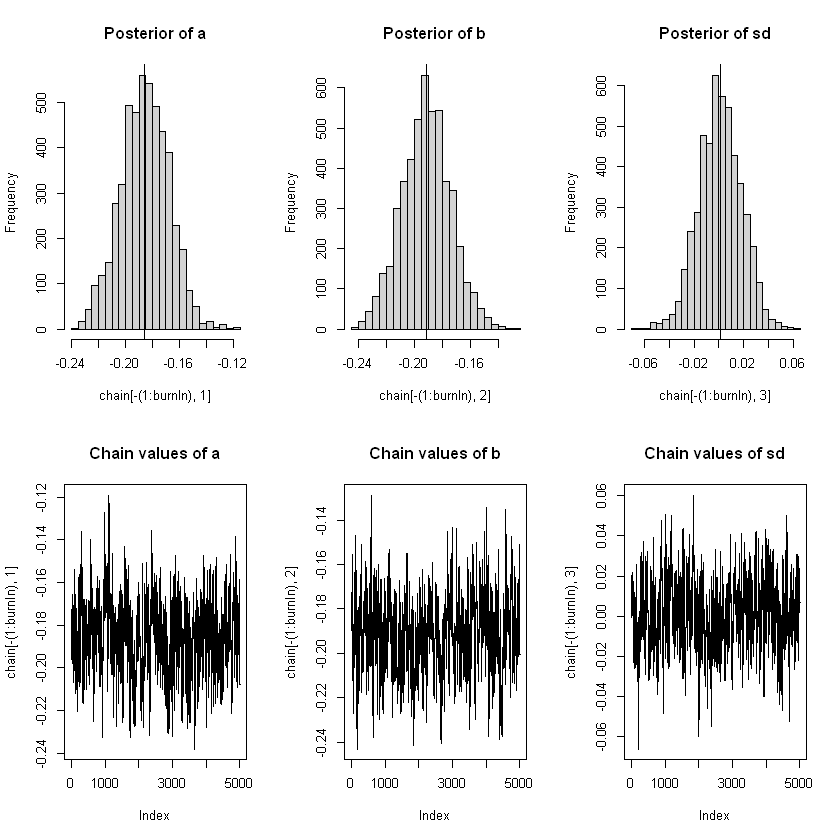

In [19]:
par(mfrow = c(2,3))
hist(chain[-(1:burnIn),1],nclass=30, main="Posterior of a")
abline(v = mean(chain[-(1:burnIn),1]))
# abline(v = t.A, col="red" )
hist(chain[-(1:burnIn),2],nclass=30, main="Posterior of b")
abline(v = mean(chain[-(1:burnIn),2]))
# abline(v = t.B, col="red" )
hist(chain[-(1:burnIn),3],nclass=30, main="Posterior of sd")
abline(v = mean(chain[-(1:burnIn),3]) )
# abline(v = t.sd, col="red" )
plot(chain[-(1:burnIn),1], type = "l", main = "Chain values of a")
# abline(h = t.A, col="red" )
plot(chain[-(1:burnIn),2], type = "l", main = "Chain values of b")
# abline(h = t.B, col="red" )
plot(chain[-(1:burnIn),3], type = "l", main = "Chain values of sd")
# abline(h = t.sd, col="red" )

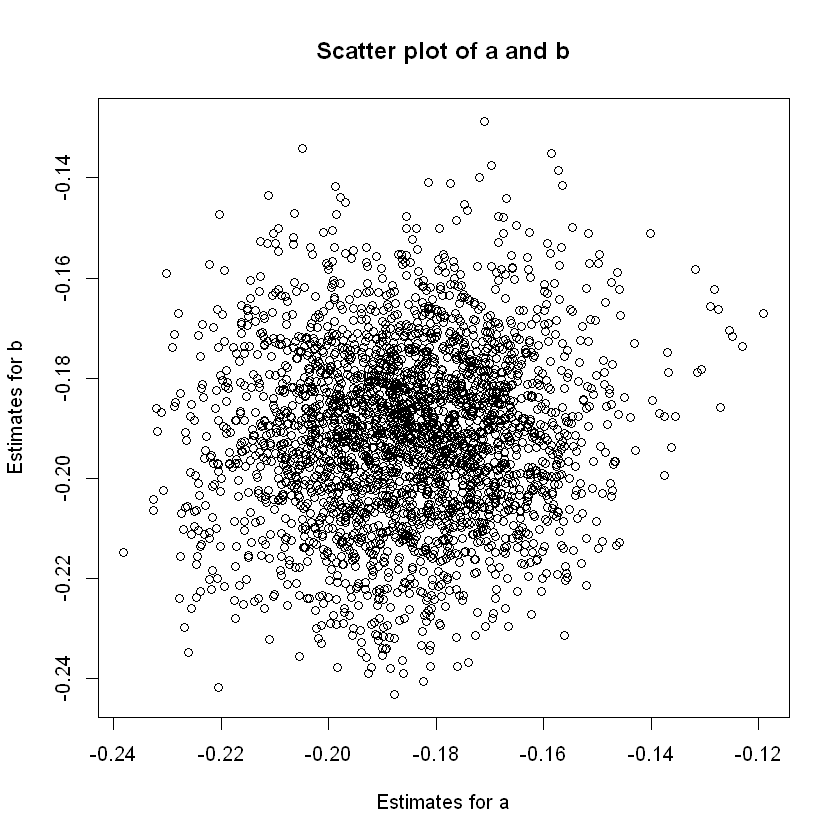

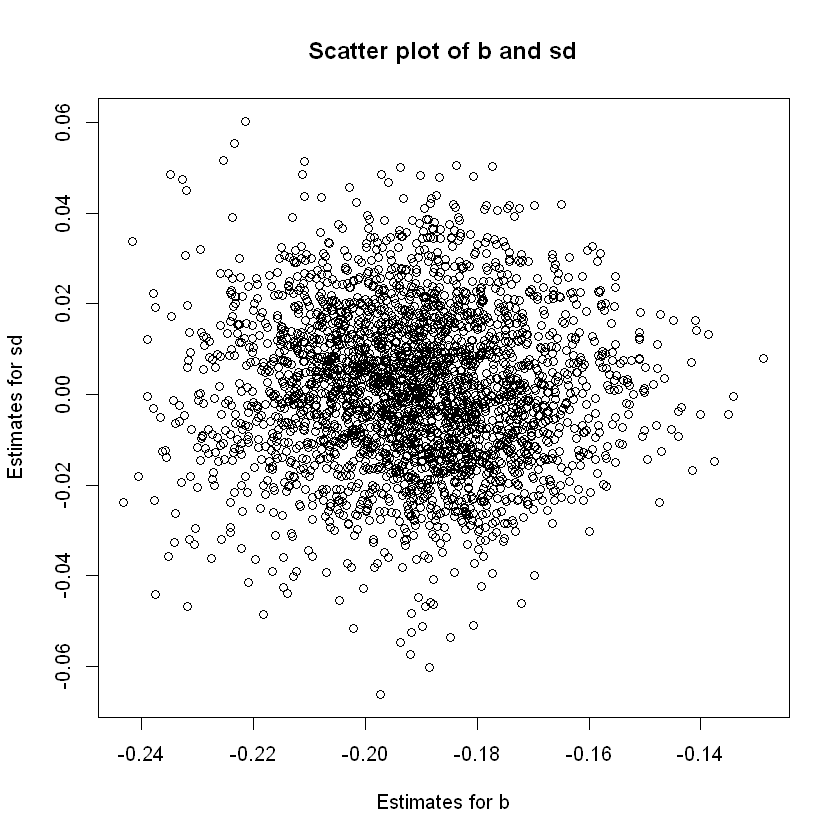

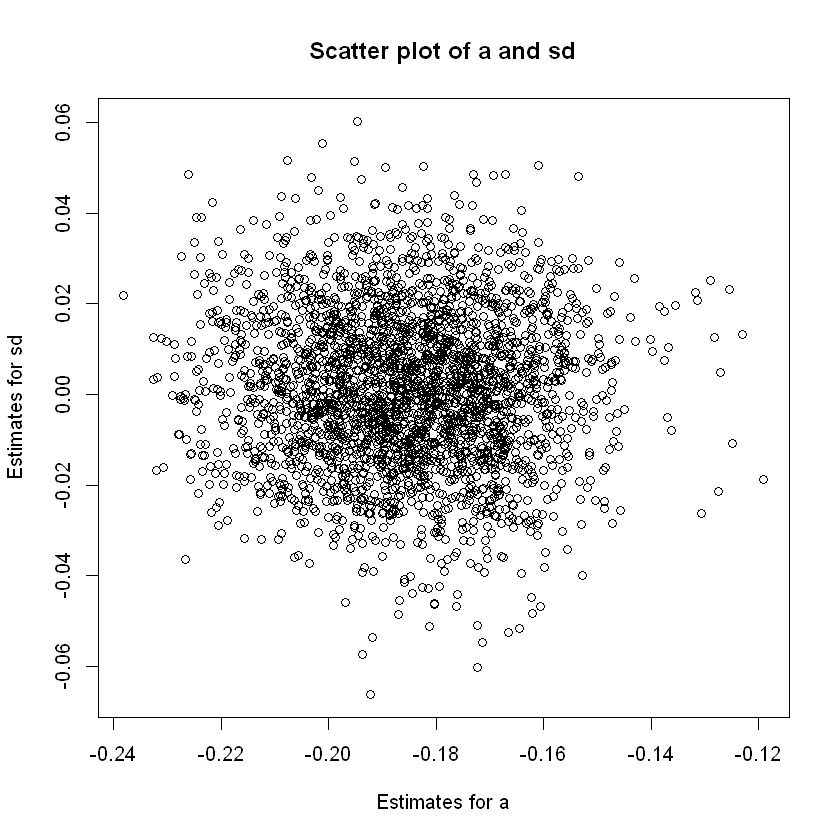

In [20]:
plot(chain[-(1:burnIn),1:2], main="Scatter plot of a and b",
xlab="Estimates for a", ylab="Estimates for b")
# abline(v = t.A, col="red" )
# abline(h = t.B, col="red" )
plot(chain[-(1:burnIn),2:3], main="Scatter plot of b and sd",
xlab="Estimates for b", ylab="Estimates for sd")
# abline(v = t.B, col="red" )
# abline(h = t.sd, col="red" )
plot(chain[-(1:burnIn),c(1,3)], main="Scatter plot of a and sd",
xlab="Estimates for a", ylab="Estimates for sd")
# abline(v = t.A, col="red" )
# abline(h = t.sd, col="red" )

ERROR: Error in eval(predvars, data, env): object 'y' not found
